In [1]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from IPython.display import display, Markdown
from config import api_key
from pprint import pprint
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Note that the ?t= is a query param for the t-itle of the
# movie we want to search for.
url = "http://www.omdbapi.com/?y="
api_key = "&apikey=" + api_key

In [3]:
# Performing a GET request similar to the one we executed
# earlier
response = requests.get(url + "2020" + api_key)
url + "2020" + api_key

'http://www.omdbapi.com/?y=2020&apikey=7ebb10da'

In [4]:
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)
data

{'Error': 'Incorrect IMDb ID.', 'Response': 'False'}


{'Response': 'False', 'Error': 'Incorrect IMDb ID.'}

## Create netflix DataFrame 

In [5]:
netflix_df= pd.read_csv('Resources/netflix_titles.csv')
netflix_originals_df= pd.read_csv('Resources/netflix_originals.csv')
netflix_tv_df= pd.read_csv('Resources/tv_shows.csv')
netflix_mo_df= pd.read_csv('Resources/MoviesOnStreamingPlatforms_updated.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Cleaning DataFrame


In [6]:
# Creating Genre Column by consolidating Genre


genre_df=pd.DataFrame()
genre_df["genre"] = ""
genre_df["genre"] = netflix_df['listed_in'].str.split(',').str[0]
netflix_df["genre"] = netflix_df['listed_in'].str.split(',').str[0]
netflix_df["genre"].value_counts()


netflix_df['genre'] = netflix_df['genre'].replace(
    {'Crime TV Shows': 'TV Shows', 
     'TV Comedies': 'TV Shows',
     'TV Dramas':'TV Shows',
     'TV Action & Adventure':'TV Shows',
     'Romantic TV Shows':'TV Shows',
     'Classic & Cult TV':'TV Shows',
     'TV Horror':'TV Shows',
     'TV Sci-Fi & Fantasy':'TV Shows',
     'Classic Movies': 'Movies', 
     'Independent Movies':'Movies',
     'Romantic Movies':'Movies',
     'Anime Feature':'Miscellaneous',
     'Cult Movies':'Miscellaneous',
     'Spanish-Language TV Shows':'Miscellaneous',
     'Sports Movies':'Miscellaneous',
     'LGBTQ Movies':'Miscellaneous',
     'Stand-Up Comedy & Talk Show':'Miscellaneous',
     'Sci-Fi & Fantasy':'Miscellaneous',
     'Anime Features':'Miscellaneous',
     'Music & Musicals':'Miscellaneous'
    })

# Dropping title column
netflix_df.drop(["title"],axis=1)

#Added a column Year_added which is the year the show is starting to available in netflix
netflix_df["year_added"]= netflix_df['date_added'].str.split(',').str[1]
netflix_df['year_added'] = netflix_df['year_added'].apply(pd.to_numeric)



#replace nan value with not listed
netflix_df =netflix_df.replace(np.nan, 'Not Listed')
netflix_tv_df =netflix_tv_df.replace(np.nan, 'Not Listed')
netflix_mo_df =netflix_mo_df.replace(np.nan, 'Not Listed')
# netflix_originals_df.replace(np.nan,"Not Listed")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year_added
0,s1,TV Show,3%,Not Listed,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Action & Adventure,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Dramas,2020


## Create bar graph of countries Vs Total Shows

Text(0.5, 1.0, 'Total number of shows per country')

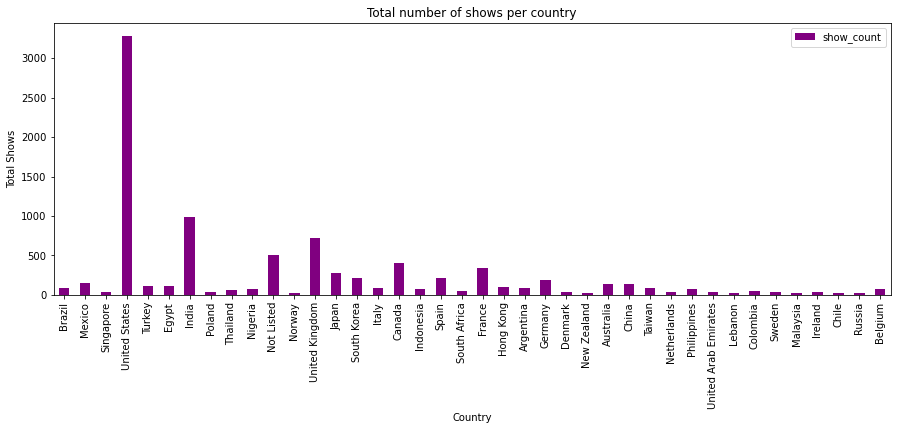

In [7]:
#The country column has more than one country. 
#So making a directory to get the country count of each shows. 
#Creating a dictionary to achieve the task.
#Empty DataFrame with four ccountry columns
country_df=pd.DataFrame()
country_df["country1"]=""
country_df["country2"]=""
country_df["country3"]=""
country_df["country4"]=""

#getting country names from the netflix_df and storing it in country_df
country_df["country1"] = netflix_df['country'].str.split(',').str[0]
country_df["country2"] = netflix_df['country'].str.split(',').str[1]
country_df["country3"] = netflix_df['country'].str.split(',').str[2]
country_df["country4"] = netflix_df['country'].str.split(',').str[3]
country_df["type"] = netflix_df["type"]

#Creating two dim list of countries
countries = [country_df["country1"], 
             country_df["country2"], 
             country_df["country3"], 
             country_df["country4"]]  
len(countries[1])

#Creating a dictionary of countries the shows are relased
showspercountry = {}        
for i in range(len(countries)):
    for j in range(len(countries[i])):
        if (isinstance(countries[i][j], str) and len(countries[i][j]) >0 ):
            countries[i][j] = countries[i][j].strip()
            if countries[i][j] in showspercountry:
                showspercountry[countries[i][j]] += 1
            else:
                showspercountry[countries[i][j]] = 1

first_list= showspercountry.values()
first_list
show_df = pd.DataFrame(first_list, index =showspercountry.keys(), 
                                              columns =['show_count'])
show_to_display_df = show_df.query('show_count>25') 

# Bar Graph to dosplay Total number of shows per country. 
show_to_display_df.plot(kind='bar', figsize=(15,5),color="purple")
plt.xlabel("Country")
plt.ylabel("Total Shows")
plt.title("Total number of shows per country")


## What is the overall distribution of Netflix content in terms of proportionality (Movies vs. TV Shows)? 

Text(0.5, 1.0, 'TV Shows Vs Movies')

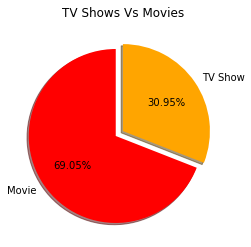

In [8]:
explode = (0.1, 0)
colors = ["red", "orange"]
TV_show= netflix_df.type.value_counts() 
plt.pie(TV_show.values, explode=explode, labels=["Movie", "TV Show"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)
plt.title("TV Shows Vs Movies")

## 	Total Movies by Year


Text(0.5, 1.0, 'Total Movies Over the years')

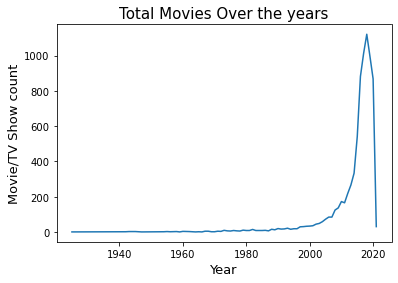

In [9]:
show_by_year=netflix_df.groupby("release_year")
#(groupby(["country", "release_year"]).count()
show_by_year_df = show_by_year.show_id.count()
x_values = show_by_year_df.index
y_values = show_by_year_df.values
plt.plot(x_values,y_values)
plt.ylabel("Movie/TV Show count", size = 13)
plt.xlabel("Year", size = 13)
plt.title("Total Movies Over the years", size = 15)


##	Total Shows by Genre

<BarContainer object of 19 artists>

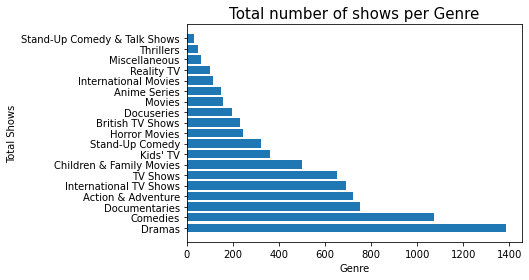

In [10]:

plt.xlabel("Genre", size = 10)
plt.ylabel("Total Shows", size = 10)
plt.title("Total number of shows per Genre", size = 15)
plt.barh(netflix_df["genre"].value_counts().index, netflix_df["genre"].value_counts())


## TV Shows Vs Movies Over last Ten Years

In [11]:
#x= netflix_df.loc[netflix_df["type"] == "Movie"]["release_year"].count()
#x1 = netflix_df.query('release_year > 2000')
x1=netflix_df.loc[netflix_df["release_year"]>2000]
x= x1.groupby(["release_year","type"])["show_id"].count()

pd.DataFrame(x)
year_show_type_df = pd.DataFrame()
year_show_type_df["year"]=x.index.get_level_values(0)
year_show_type_df["type"]=x.index.get_level_values(1)
year_show_type_df["Total_count"]=x.values
year_show_type_df

tv_show = year_show_type_df.loc[year_show_type_df.type=="TV Show"].Total_count
movies =  year_show_type_df.loc[year_show_type_df.type=="Movie"].Total_count
year = year_show_type_df.year.unique()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


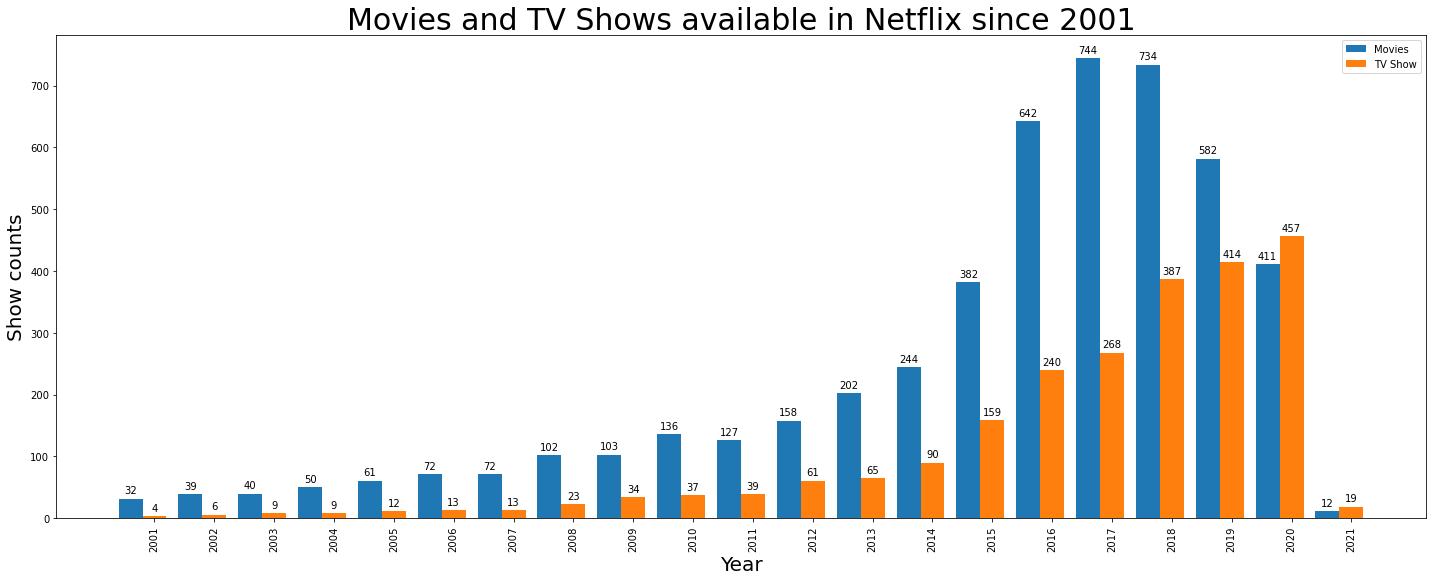

In [12]:
labels= year
Movies = movies.values
TV_shows = tv_show.values
colors = ["green", "purple"]


x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars
print(x)

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x , movies, width, label='Movies')
#rects1 = ax.bar(ind, menMeans, width, color='r') #yerr=menStd)

rects2 = ax.bar(x + width , tv_show, width, label='TV Show')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Show counts', size = 20)
ax.set_xlabel('Year', size = 20)
ax.set_title('Show count by TV shows and Movies')
ax.set_xticks(x+width)
ax.set_xticklabels(labels, rotation = 'vertical')
ax.legend((rects1[0], rects2[0]), ('Movies', 'TV Shows'))
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.title("Movies and TV Shows available in Netflix since 2001", size = 30)
plt.plot(colors=colors)
plt.show()

## Netflix Originals

In [13]:
#Cleaning netflix Original 
netflix_originals_df.dtypes
netflix_originals_df["Year_Premiere"]= netflix_originals_df['Premiere'].str.split(', ').str[1]


netflix_originals_df['Year_Premiere'] = netflix_originals_df['Year_Premiere'].replace(
    {"2020[10]": "2020", 
     "2020[1]": "2020",
     '2020[2]': '2020',
     '2020[3]': '2020',
     '2020[4]': '2020',
     '2020[5]': '2020',
     '2020[6]': '2020',
     '2020[7]': '2020',
     '2020[8]': '2020',
     '2020[9]': '2020',
     '2020[236]': '2020'
    })

netflix_originals_df.groupby("Year_Premiere").count()

,Title,Genre,Original Network,Premiere,Seasons,Length,Netflix Exclusive Regions,Status
Year_Premiere,,,,,,,,
2012,1,1,1,1,0,1,1,0
2013,5,5,5,5,4,5,5,4
2014,12,12,12,12,5,12,12,5
2015,27,27,27,27,17,27,27,17
2016,62,62,62,62,31,62,62,31
2017,122,122,122,122,56,122,122,56
2018,216,216,216,216,116,216,216,116
2019,287,287,287,287,160,287,287,160
2020,184,184,184,184,108,184,184,108


Text(0, 0.5, 'Total shows Over the years')

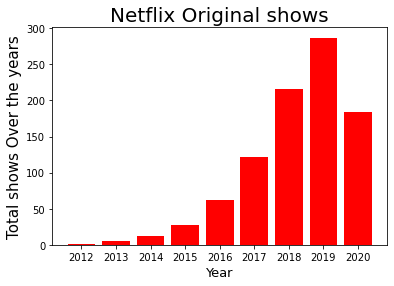

In [14]:

original_show_by_year=netflix_originals_df.groupby("Year_Premiere")
#(groupby(["country", "release_year"]).count()
original_show_by_year_df = original_show_by_year.Title.count()
x_values = original_show_by_year_df.index
y_values = original_show_by_year_df.values
plt.bar(x_values,y_values, color="r")
plt.title("Netflix Original shows", size = 20)
plt.xlabel("Year", size = 13)
plt.ylabel("Total shows Over the years", size = 15)


## Months Vs Shows
### (Is there a increase or decrease in number of movies available in netflix during any specific months or season)

In [15]:
netflix_df.head()
#Added a column Month_added which is the month the show is starting to available in netflix
new = netflix_df["date_added"].str.split(" ", n = 1, expand = True)
netflix_df["month_added"]= new[0]
month_df= netflix_df.groupby("month_added").show_id.count()


['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] [746, 466, 661, 596, 537, 538, 592, 612, 614, 780, 730, 817]


Text(0.5, 1.0, 'Movies and Months')

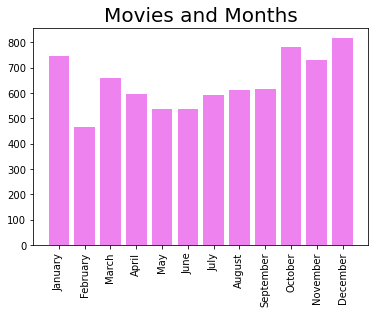

In [16]:
x_values=["January", "February", "March","April","May","June","July","August","September","October","November","December"]
y_values=[month_df.January, month_df.February, month_df.March, month_df.April, month_df.May, month_df.June, 
          month_df.July, month_df.August, month_df.September, month_df.October, month_df.November, month_df.December]
print(x_values, y_values)
x= [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(x, x_values, rotation='vertical')
plt.bar(x_values,y_values, width=.8, color='violet')
plt.title("Movies and Months", size = 20)



plt.pie(y_values,x_values)

## Distribution of TV Shows and Movies by Age in Netflix

Text(0.5, 1.0, 'Movies by Age in netflix')

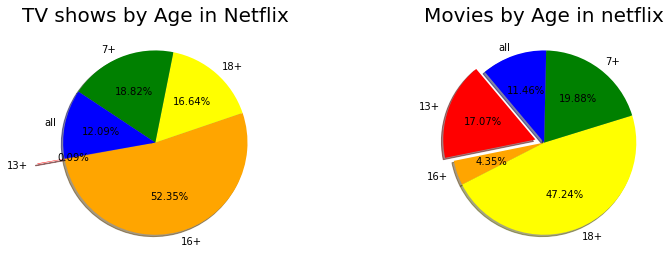

In [17]:
describe_tv_shows = netflix_tv_df["IMDb"].describe()
describe_tv_shows
age_tv = netflix_tv_df.groupby("Age").count()
age_tv
explode = (0.3,0,0,0,0)
colors = ["red", "orange", "yellow", "green", "blue"]
sizes = [4, 2359,750,848,545]

fig = plt.figure()
ax1 = fig.add_axes([.1, .8, .8, .8], aspect=1)

plt.pie(sizes, explode=explode, labels=["13+","16+","18+","7+","all"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=190)
plt.title("TV shows by Age in Netflix", size=20)


ax2 = fig.add_axes([1, .8, .8, .8], aspect=1)

age_mo = netflix_mo_df.groupby("Age").count()
age_mo
explode = (0.1,0,0,0,0)
colors = ["red", "orange", "yellow", "green", "blue"]
sizes = [1255, 320,3474,1462,843]
plt.pie(sizes, explode=explode, labels=["13+","16+","18+","7+","all"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=130)
plt.title("Movies by Age in netflix", size=20)



## Which platform has the greatest number of movies available? 
## Which platform has the greatest number of tv shows available?


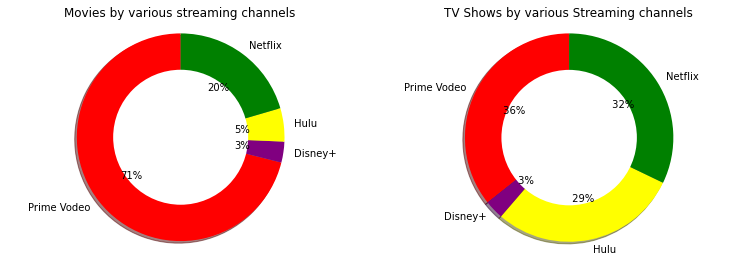

In [18]:
Prime_video_mo=len(netflix_mo_df.loc[netflix_mo_df["Prime Video"]==1])
Disney_plus_mo=len(netflix_mo_df.loc[netflix_mo_df["Disney+"]==1])
Hulu_mo=len(netflix_mo_df.loc[netflix_mo_df["Hulu"]==1])
Netlix_mo=len(netflix_mo_df.loc[netflix_mo_df["Netflix"]==1])

Prime_video_tv=len(netflix_tv_df.loc[netflix_tv_df["Prime Video"]==1])
Disney_plus_tv=len(netflix_tv_df.loc[netflix_tv_df["Disney+"]==1])
Hulu_tv=len(netflix_tv_df.loc[netflix_tv_df["Hulu"]==1])
Netlix_tv=len(netflix_tv_df.loc[netflix_tv_df["Netflix"]==1])

name = ["Prime Vodeo", "Disney+", "Hulu", "Netflix"]
size1 = [Prime_video_mo, Disney_plus_mo,Hulu_mo,Netlix_mo]
size2=   [Prime_video_tv, Disney_plus_tv,Hulu_tv,Netlix_tv]
colors = ["red", "purple", "yellow", "green", "blue"]

fig = plt.figure()
ax1 = fig.add_axes([.1, .8, .8, .8], aspect=1, title="Movies by various streaming channels")

plt.pie(size1, labels=name, autopct='%0.f%%', colors = colors, shadow=True, startangle=90)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')



ax2 = fig.add_axes([1, .8, .8, .8], aspect=1, title="TV Shows by various Streaming channels")

plt.pie(size2, labels=name, autopct=' %0.f%%', colors = colors, shadow=True, startangle=90)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')

plt.show()



##  Regression Analysis of Rotten Tomatoes and IMDb Ratings 

In [21]:
netflix_mo_df.head()
clean_mo = netflix_mo_df.loc[(netflix_mo_df["Rotten Tomatoes"] !="Not Listed") & (netflix_mo_df["IMDb"] !="Not Listed")]
y_list=clean_mo["IMDb"]
ylist = []
for i in y_list.values:
    ylist.append(i)
xlistclone =clean_mo["Rotten Tomatoes"]
xlist = []
for i in xlistclone:
    xlist.append(i)
for i in range(len(xlist)):
    xlist[i] = int(xlist[i][0:len(xlist[i]) - 1])

    
cleanest_db= pd.DataFrame()
cleanest_db["Rotten Tomatoes"]=xlist
cleanest_db["IMDb"]=ylist

r value 0.6163204883344221 


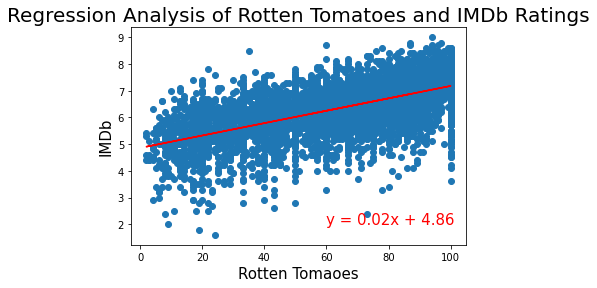

In [32]:
# Create Plot
x_values = cleanest_db["Rotten Tomatoes"]
y_values = cleanest_db["IMDb"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,2),fontsize=15,color="red")
plt.xlabel('Rotten Tomaoes', size = 15)
plt.ylabel('IMDb',size=15)
plt.title("Regression Analysis of Rotten Tomatoes and IMDb Ratings", size=20)
print(f"r value {rvalue} ")
plt.show()
